In [ ]:
!wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166" -O final_vg.csv


--2025-10-08 16:30:31--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.173, 108.157.172.176, 108.157.172.10, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2041483 (1.9M) [text/plain]
Saving to: ‘final_vg.csv’

final_vg.csv        100%[===================>]   1.95M  --.-KB/s    in 0.08s   

2025-10-08 16:30:31 (25.7 MB/s) - ‘final_vg.csv’ saved [2041483/2041483]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'figure.dpi':120})
sns.set_theme(style='whitegrid')


In [ ]:
vg = pd.read_csv('final_vg.csv', encoding='latin1')
vg.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,Â¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


In [ ]:
vg.columns = [c.strip().lower().replace(' ', '_') for c in vg.columns]
vg = vg.rename(columns={'na_sales':'na_sales','eu_sales':'eu_sales','jp_sales':'jp_sales','other_sales':'other_sales','global_sales':'global_sales'})
vg.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16652 entries, 0 to 16651
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16652 non-null  int64  
 1   name          16652 non-null  object 
 2   platform      16652 non-null  object 
 3   year          16381 non-null  float64
 4   genre         16652 non-null  object 
 5   publisher     16594 non-null  object 
 6   na_sales      16652 non-null  float64
 7   eu_sales      16652 non-null  float64
 8   jp_sales      16652 non-null  float64
 9   other_sales   16652 non-null  float64
 10  global_sales  16652 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
vg['year'] = pd.to_numeric(vg['year'], errors='coerce').astype('Int64')
vg['global_sales'] = pd.to_numeric(vg['global_sales'], errors='coerce').fillna(0)
vg.head()


,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,2061,1942,NES,1985,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,Â¡Shin Chan Flipa en colores!,DS,2007,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


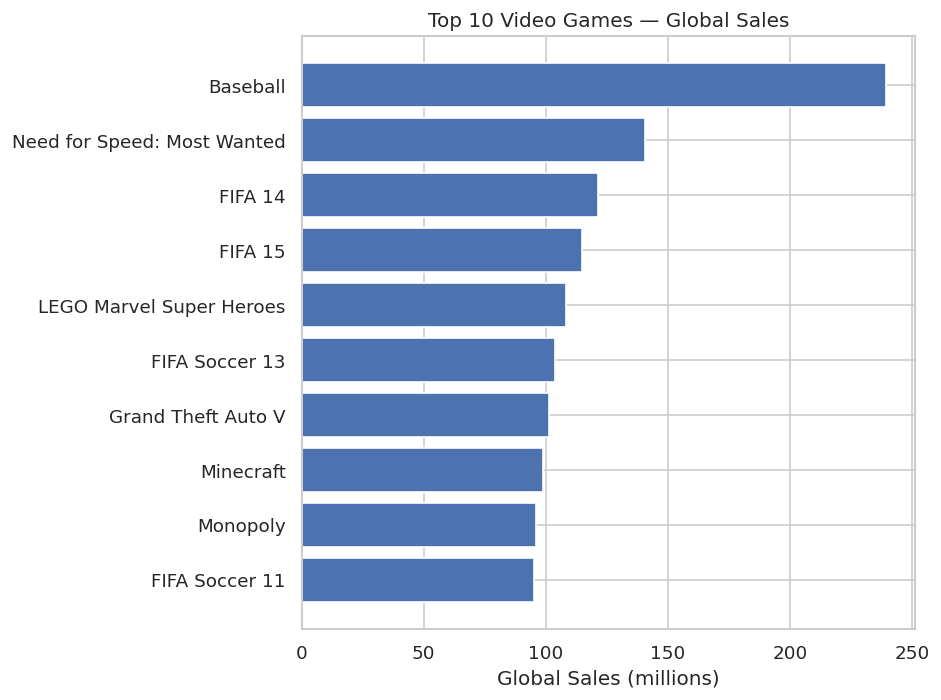

In [ ]:
top10 = vg[['name','global_sales']].groupby('name', as_index=False).sum().nlargest(10,'global_sales').sort_values('global_sales')
plt.figure(figsize=(8,6))
plt.barh(top10['name'], top10['global_sales'])
plt.xlabel('Global Sales (millions)')
plt.title('Top 10 Video Games — Global Sales')
plt.tight_layout()
plt.show()


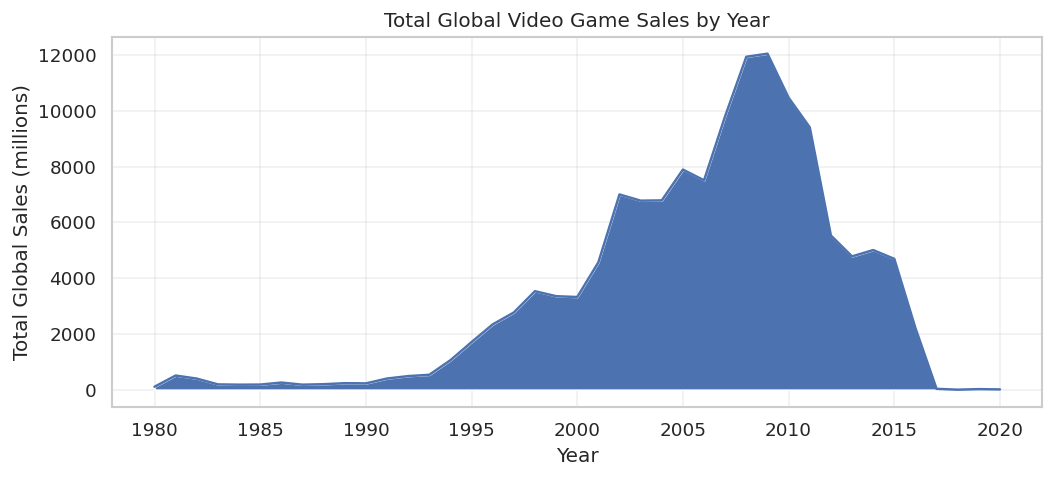

In [ ]:
sales_by_year = vg.groupby('year', dropna=True)['global_sales'].sum().reset_index().dropna().sort_values('year')
plt.figure(figsize=(10,4))
plt.fill_between(sales_by_year['year'].astype(int), sales_by_year['global_sales'])
plt.plot(sales_by_year['year'].astype(int), sales_by_year['global_sales'])
plt.xlabel('Year')
plt.ylabel('Total Global Sales (millions)')
plt.title('Total Global Video Game Sales by Year')
plt.grid(alpha=0.3)
plt.show()


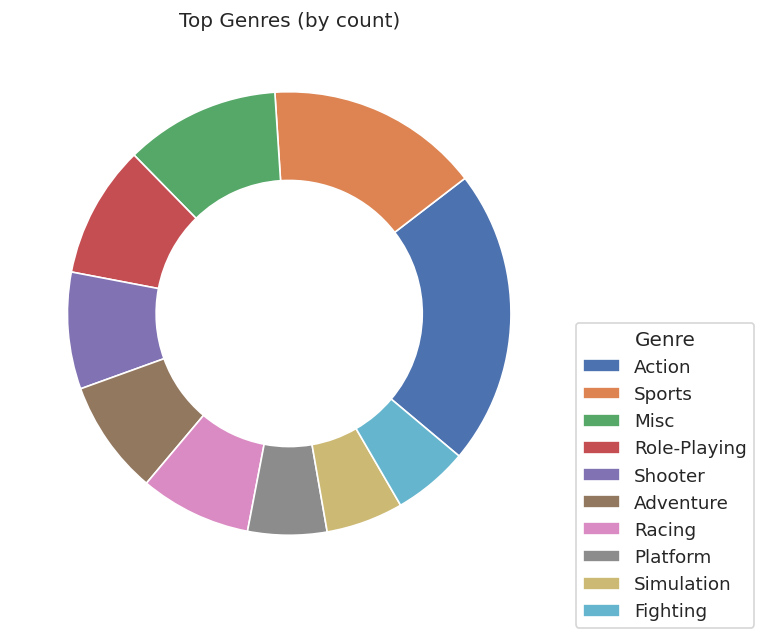

In [ ]:
genre_counts = vg['genre'].value_counts().nlargest(10)
labels = genre_counts.index
sizes = genre_counts.values
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts = ax.pie(sizes, wedgeprops=dict(width=0.4), startangle=-40)
ax.legend(wedges, labels, title='Genre', bbox_to_anchor=(1,0.5))
ax.set(aspect='equal', title='Top Genres (by count)')
plt.show()


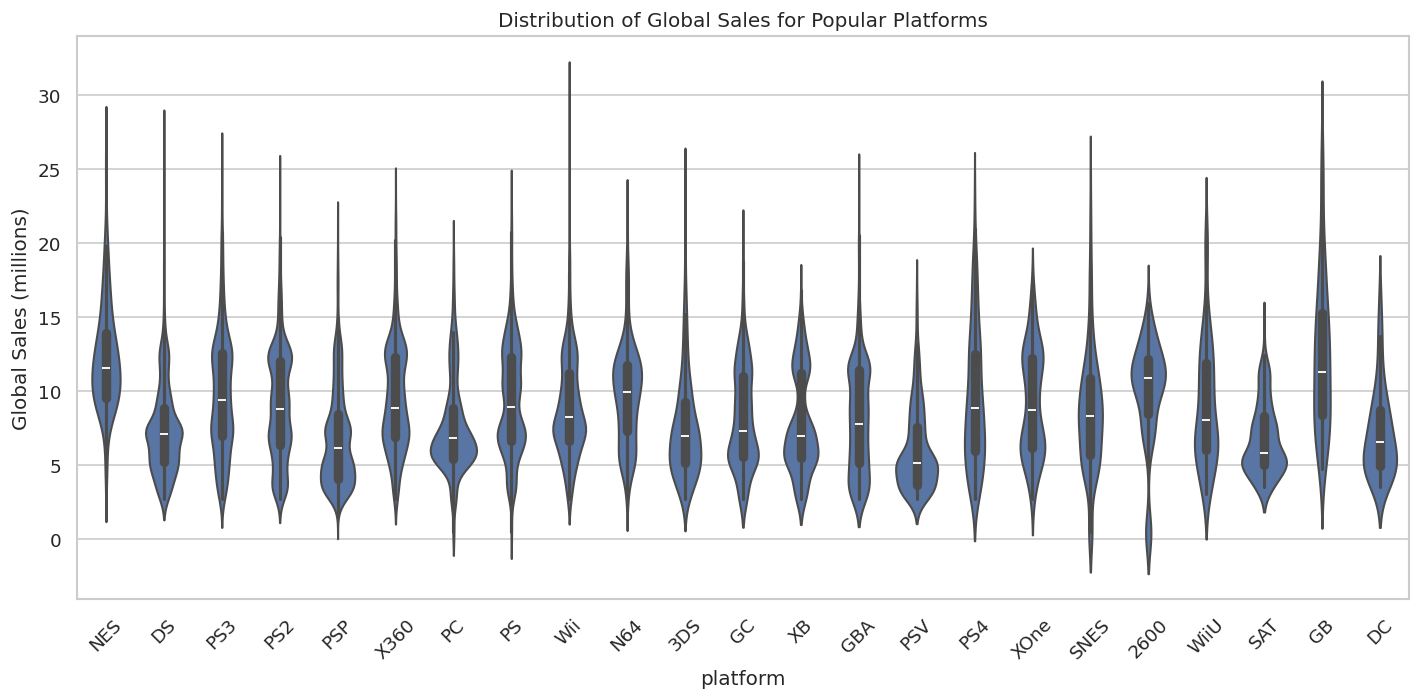

In [ ]:
plt.figure(figsize=(12,6))
platform_counts = vg['platform'].value_counts()
popular = platform_counts[platform_counts>=50].index
plot_df = vg[vg['platform'].isin(popular) & (vg['global_sales']>0)]
sns.violinplot(data=plot_df, x='platform', y='global_sales')
plt.xticks(rotation=45)
plt.ylabel('Global Sales (millions)')
plt.title('Distribution of Global Sales for Popular Platforms')
plt.tight_layout()
plt.show()


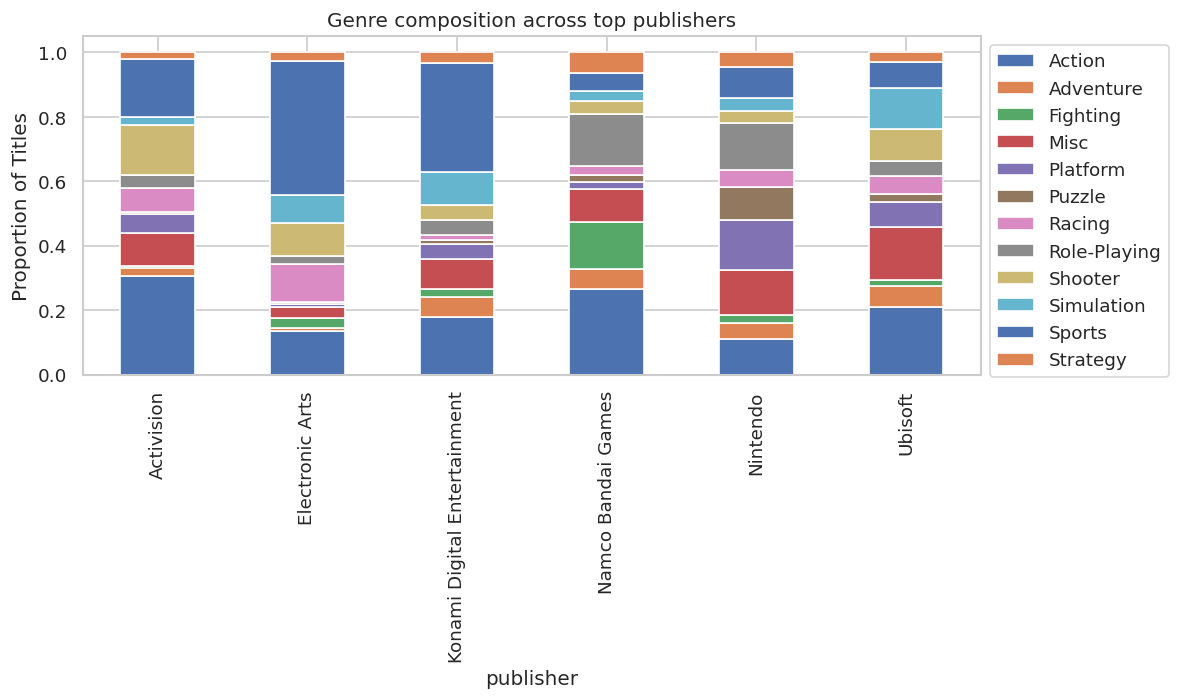

In [ ]:
pub_top = vg['publisher'].value_counts().nlargest(6).index
sub = vg[vg['publisher'].isin(pub_top)]
ct = pd.crosstab(sub['publisher'], sub['genre'])
ct = ct.div(ct.sum(axis=1), axis=0)
ct.plot(kind='bar', stacked=True, figsize=(10,6))
plt.ylabel('Proportion of Titles')
plt.title('Genre composition across top publishers')
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


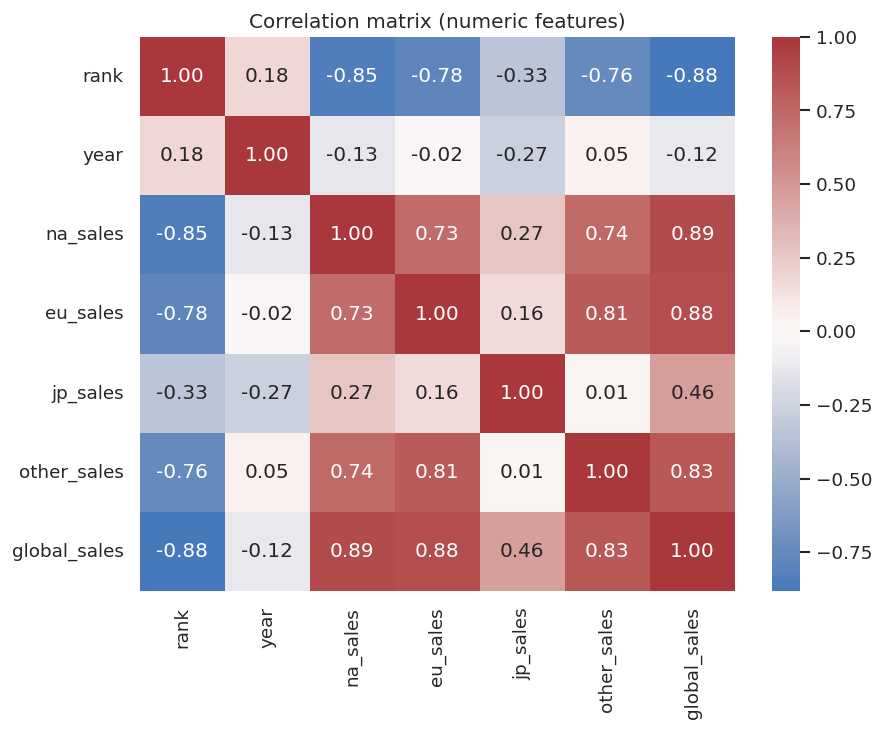

In [ ]:
num_cols = vg.select_dtypes(include=['number']).columns
plt.figure(figsize=(8,6))
sns.heatmap(vg[num_cols].corr(), annot=True, fmt='.2f', cmap='vlag', center=0)
plt.title('Correlation matrix (numeric features)')
plt.show()


In [ ]:
if 'user_score' in vg.columns:
    sub = vg.dropna(subset=['user_score','global_sales'])
    plt.figure(figsize=(8,5))
    sns.regplot(data=sub, x='user_score', y='global_sales', scatter_kws={'s':10}, line_kws={'linewidth':2})
    plt.xlabel('User Score')
    plt.ylabel('Global Sales (millions)')
    plt.title('User score vs Global sales')
    plt.show()
else:
    print('user_score column not found')


user_score column not found


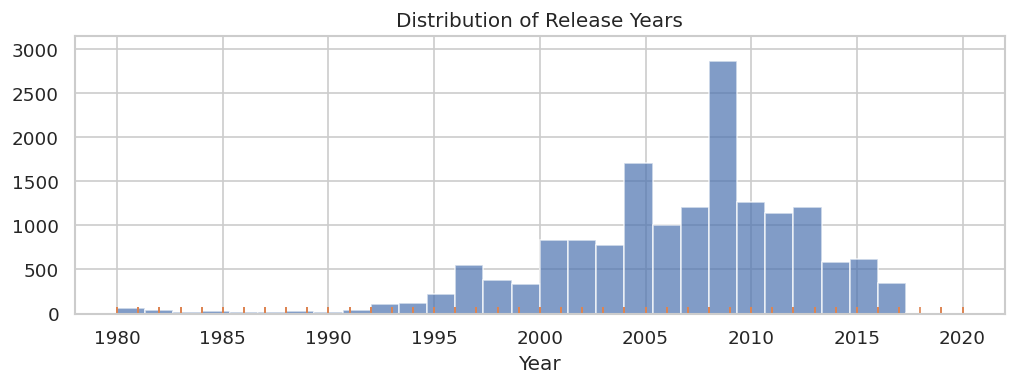

In [ ]:
years = vg['year'].dropna().astype(int)
plt.figure(figsize=(10,3))
plt.hist(years, bins=30, alpha=0.7)
sns.rugplot(years)
plt.xlabel('Year')
plt.title('Distribution of Release Years')
plt.show()


In [ ]:
sample = vg.sample(frac=0.3, random_state=42)
sample.to_csv('final_vg_edited_sample.csv', index=False)
print('Saved sample to final_vg_edited_sample.csv')


Saved sample to final_vg_edited_sample.csv
